In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import os

def git_get():
    '''Get latest version from github'''
    os.system("git remote update")
    os.system("git pull")
    
def git_put(message):
    '''Adds/commits this notebook'''
    os.system("git add ML_projekt1.ipynb")
    os.system('git commit -m "{}"'.format(message))
    os.system("git push")

In [1]:
%matplotlib inline 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# IMDB Movie Analysis (fælles)

Kristian Rygaard Svendsen (s153856)<br>
Christian Bill Pedersen (s154241)

## Analysis goals

In this analysis we will explore the world of movies through a 5000+ entries dataset from IMDB.com. The ultimate goal for this dataanalysis is to determine which features make a movie "successful". The definition of "successful" is of course a bit vague, but during this dataanalysis we will define success as high popularity and/or gross revenue. We will also be exploring grouping of movies through a variety of machine learning methods.

## Initial assumptions

Our initial assumption is that more popular movies in general generate a bigger revenue, since we assume popularity is highly correlated with the total number of consumers for that specific movie.

## Method of analysis

This analysis uses the OSEMN model, which is an acronym for: Obtain, Scrub, Explore, Model, and iNterpret.

https://machinelearningmastery.com/how-to-work-through-a-problem-like-a-data-scientist/

# 1. Obtain Data

## Dataset source and description

The IMDB Movie dataset from Kaggle.com, contains information from 5000 movies, obtained by webscraping IMDB.com. Note that at the time of writing, the dataset was recently removed from Kaggle and replaced with a new dataset which is not compatible with this notebook. Kaggle hosts a multitude of "kernels" (runable data science papers) using this dataset, with titles such as: "film recommendation engine", "Movie Recommendations" and "Categorizing actors".

https://www.kaggle.com/tmdb/tmdb-movie-metadata/data

# 2. Scrub Data

## Data preparation, cleaning and structure

Throughout this analysis we will handle the dataset in a dictionary named "data". It is the hope of the authors that this structure will make code-snippets more readable and remove the need for redundant comment/explanations (this paragraph excluded). In addition to the raw data, we will prepare two other versions of our dataset: 'No_na' - where entries containing N/A data have been removed and 'numerical' which contain only numerical data columns. We justify this by assuming representation similarity in columns such as 'director_name' and 'director_facebook_likes'. This is due to the fact that "being James Cameron" doesn't mean anything, but having a "relavant attribute" such as popularity is expected to have a higher impact.

In [4]:
data = {}
data['raw'] = pd.read_csv("movie_metadata.csv")
data['no_na'] = data['raw'].dropna();
data['n_removed_na'] = data['raw'].shape[0] - data['no_na'].shape[0]
data['numerical'] = data['no_na'].select_dtypes(exclude=['object']) #.fillna(value=0, axis=1)
print(f"Number of removed rows in 'no_na' dataset: {data['n_removed_na']} out of {data['raw'].shape[0]}")

SyntaxError: invalid syntax (<ipython-input-4-8f398865ef2b>, line 6)

## Post-cleaning data validation

As indicated above, many rows containing N/A-data was removed from the dataset. It is acknowledged by the authors that may reduce the prediction generalizability, but at the time of writing this decision seems justifiable in comparisson to potentially mishandling N/A's.

# 3. Explore Data (Kristian)

## Attribute overview

In the following table all the 28 different attributes are explained and it's shown whether they are discrete or continous together with their level of measurement.  


<table valign="left">
  <tr>
    <th>Attribute</th>
    <th>Explanation</th>
    <th>Discrete/continous</th>
    <th>Nominal/Ordinal/Interval/Ratio</th>
  </tr>
  <tr>
    <td>color</td>
    <td>Is the movie in color or black and white</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>director_name</td>
    <td>Name of the director</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>num_critic_for_reviews</td>
    <td>Number of critics reviews</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>duration</td>
    <td>Duration of the movie</td>
    <td>Continous</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>director_facebook_likes</td>
    <td>The directors amount of facebook likes</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>actor_3_facebook_likes</td>
    <td>Third actor likes on Facebook</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>actor_2_name</td>
    <td>Second actor's name</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>actor_1_facebook_likes</td>
    <td>First actor likes on Facebook</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>gross</td>
    <td>Gross income of the movie</td>
    <td>Continous</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>genres</td>
    <td>The movies genre </td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>actor_1_name</td>
    <td>First actor's name</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>movie_title</td>
    <td>Title of the movie</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>num_voted_users</td>
    <td>Number of votes at IMDB</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>cast_total_facebook_likes</td>
    <td>Total Facebook likes for the cast</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>actor_3_name</td>
    <td>Third actor's name</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>facenumber_in_poster</td>
    <td>Amount of faces in the poster</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>plot_keywords</td>
    <td>Keyword related to movie plot</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>movie_imdb_link</td>
    <td>The movies imdb link</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>num_user_for_reviews</td>
    <td>Number of user reviews</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>language</td>
    <td>Spoken language</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>country</td>
    <td>Country of origin </td>
    <td>Discrete</td>
    <td>Nominal </td>
  </tr>
  <tr>
    <td>content_rating</td>
    <td>Content rating</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>budget</td>
    <td>The budget of the movie</td>
    <td>Continous</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>title_year</td>
    <td>Release date</td>
    <td>Discrete</td>
    <td>Interval</td>
  </tr>
  <tr>
    <td>actor_2_facebook_likes</td>
    <td>Second actor likes on Facebook</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>imdb_score</td>
    <td>Score on imdb (voted by users)</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>aspect_ratio</td>
    <td>Aspect ratio of the movie</td>
    <td>Discrete</td>
    <td>Nominal </td>
  </tr>
  <tr>
    <td>movie_facebook_likes</td>
    <td>Total Facebook likes of the movie</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
</table>

## Summary statistics of numerical data

A summary of the statistics are given below, including the mean, standard deviation, and the different quartiles for each attribute. These values will be relevant later, when interpreting results. Example given for 'gross', 'budget' and 'imdb_score'.

In [3]:
data['numerical'][['gross','budget','imdb_score']].describe().round(decimals=2)

,gross,budget,imdb_score
count,3.756000e+03,3.756000e+03,3756.00
mean,5.261282e+07,4.623685e+07,6.47
std,7.031787e+07,2.260103e+08,1.06
min,1.620000e+02,2.180000e+02,1.60
25%,8.270233e+06,1.000000e+07,5.90
50%,3.009311e+07,2.500000e+07,6.60
75%,6.688194e+07,5.000000e+07,7.20
max,7.605058e+08,1.221550e+10,9.30


## Columns containing catagorical data

In pandas dataframes, catagorical data is represented as 'object' data.

In [4]:
data['raw'].dtypes.value_counts()

float64    13
object     12
int64       3
dtype: int64

## Outlier detection

For numerical data we wish to see if there are outliers. According to the "Central limit theorem" we should expect most distributions to tend towards a normal distribution.

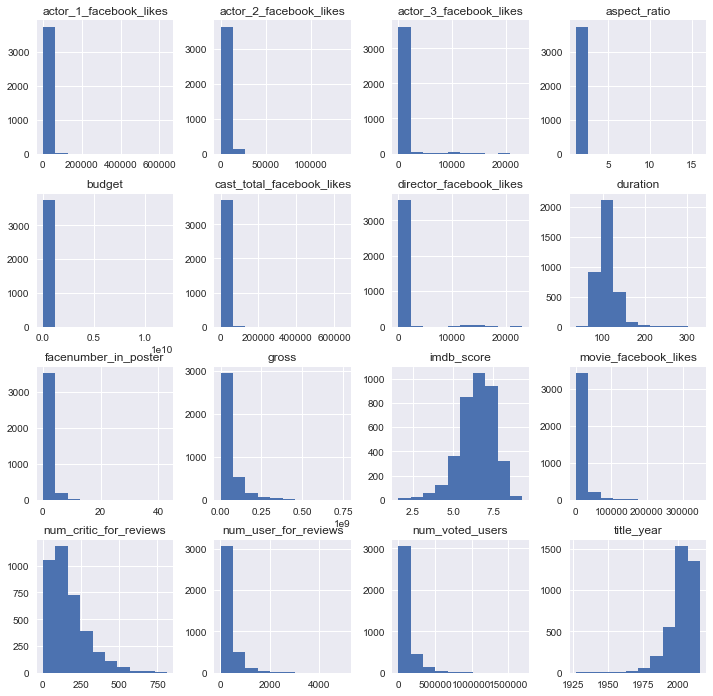

In [5]:
data['no_na'].hist(figsize=(12,12));

From our histograms we can see that most of dataset catagories contain outliers. For instance budget seems to have an unlikely high outlier, indicated by the x-axis scaling.

In [6]:
data['raw'].loc[data['raw']['budget'].idxmax()][['movie_title','budget']]

movie_title      The Host 
budget         1.22155e+10
Name: 2988, dtype: object

The highest movie budget is from a movie called "The Host". A further investigation on IMDB.com shows this is because the budget currency is described in KRW (Korean Won).

## Machine learning tasks

By grouping the dataset features, we can select the correct machine learning strategy based on the table below.

<table>
  <tr>
    <th></th>
    <th>Supervised</th>
    <th>Unsupervised</th>
  </tr>
  <tr>
    <td>Continuous</td>
    <td>Regression</td>
    <td>Clustering</td>
  </tr>
  <tr>
    <td>Discrete</td>
    <td>Classification</td>
    <td>Association mining</td>
  </tr>
  <tr>
    <td></td>
    <td></td>
    <td>Anomaly detection</td>
  </tr>
</table>

<h2> Predictive tasks (supervised learning) </h2>

In machine learning there are two predictive tasks: regression and classification. 

### Regression

The other predictive task, regression, is performed on the different attributes. But before using regression on all of the attributes, one can look at a created "Pearson correlation matrix". To get an idea of which attributes correlate. And then do the regression on these.
It could for example be possible to predict the 'gross' as a function of 'budget' and 'cast_total_facebook_likes'.

### Classification

As the primary machine learning aim for the dataset is to predict the most succesful movie, a classification problem could be given to find out what the best movies have in common, for example the 'imdb_score' is sorted in to five groups as seen in the table below:

<table style="undefined;table-layout: fixed; width: 162px">
<colgroup>
<col style="width: 89.007161px">
<col style="width: 73.007161px">
</colgroup>
  <tr>
    <th>imdb_score</th>
    <th>Movie quality</th>
  </tr>
  <tr>
    <td>[0-2]</td>
    <td>Horrible</td>
  </tr>
  <tr>
    <td>[2-4]</td>
    <td>Bad</td>
  </tr>
  <tr>
    <td>[4-6]</td>
    <td>Mediocre</td>
  </tr>
  <tr>
    <td>[6-8]</td>
    <td>Good</td>
  </tr>
  <tr>
    <td>[8-10]</td>
    <td>Excellent</td>
  </tr>
</table>

With Movie quality as a class label it could be possible to see what the different qualities have in common. And from that be able to assign a previously unseen project with the correct label. 

<h2> Descriptive tasks (unsupervised learning) </h2>

The other kind of tasks used in machine learning is the descriptive tasks, which differs from the predictive tasks since they are unsupervised.  

### Clustering

The first descriptive task is clustering, where the goal is to group the given data objects into clusters where the objects within each cluster are similar. A number of features are associated with the objects, and from that the similarity between the objects is defined.

After calculating Principle Components we can cluster with K-means. With n-cluster we can investigate relevant group attribute distributions, such as 'gross' or 'imdb_score'.

### Association rule mining

Another desriptive task is association rule mining, where the goal is to produce dependency rules from seemingly unrelated data. 
An association rule has an antecedent (if) and from that a consequent (then). An antecedent is found from the data and the consequent is then calculated from a combination of the antecedent. 

An association rule from this dataset could be with items from 'genres':
<p>{sci-fi,thriller} &rarr; {action}</p>





 

### Anomaly detection

The last descriptive task, is anomaly detection which for example can be used to find outliers.
For instance a movie with a very high gross, such as Avatar, could deviate from other movies since the gross is extremely high compared to a mean gross. 

## Preprocessing (Christian)

### Principle Component Analysis

In our Principe Component Analysis we wish to reduce the number of dimensions in our dataset without losing too much of the data. In this method of analysis it is worth noting, that while we may be able to reduce the number of dimensions these might not be easily, if at all, interpretable. 

Before doing a Principle Component Analysis we wish to extract only numerical data our dataset as well as find eigenvalues and eigenvectors. From this information we can generate a visualization of the individual and cumulative variance explained by the eigenvectors. This will be important for determining a suitable number of components for our analysis.

In [7]:
data['X_std'] = StandardScaler().fit_transform(data['numerical'].values)
data['covariance'] = np.cov(data['X_std'].T)
data['eigenvalues'], data['eigenvectors'] = np.linalg.eig(data['covariance'])
data['eigenvalues_variance_explained'] = [(i/data['eigenvalues'].sum())*100 for i in sorted(data['eigenvalues'], reverse=True)]

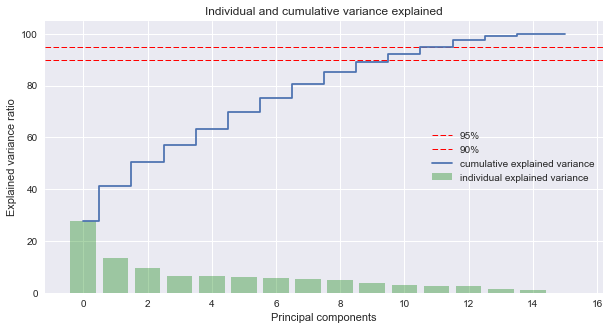

In [8]:
plt.figure(figsize=(10, 5))
plt.bar(range(16), data['eigenvalues_variance_explained'], alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.axhline(y=95, linewidth=1, color='r', linestyle='dashed', label="95%")
plt.axhline(y=90, linewidth=1, color='r', linestyle='dashed', label="90%")
plt.step(range(16), np.cumsum(data['eigenvalues_variance_explained']), where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Individual and cumulative variance explained')
plt.show()

From this plot we can see that using 11 components, our model will be able to explain 90% - 95% of the total variance. So this looks promising for our analysis as we will be able to reduce our total dimensions from 16 to 10.

### Regression

For our regression analysis we want to investigate any correlations, we can calculate a correlation matrix and plot this as a heatmap to get an overview. On this plot we hide the diagonal and upper half, and highlight all correlations above 0.5, or below -0.5.

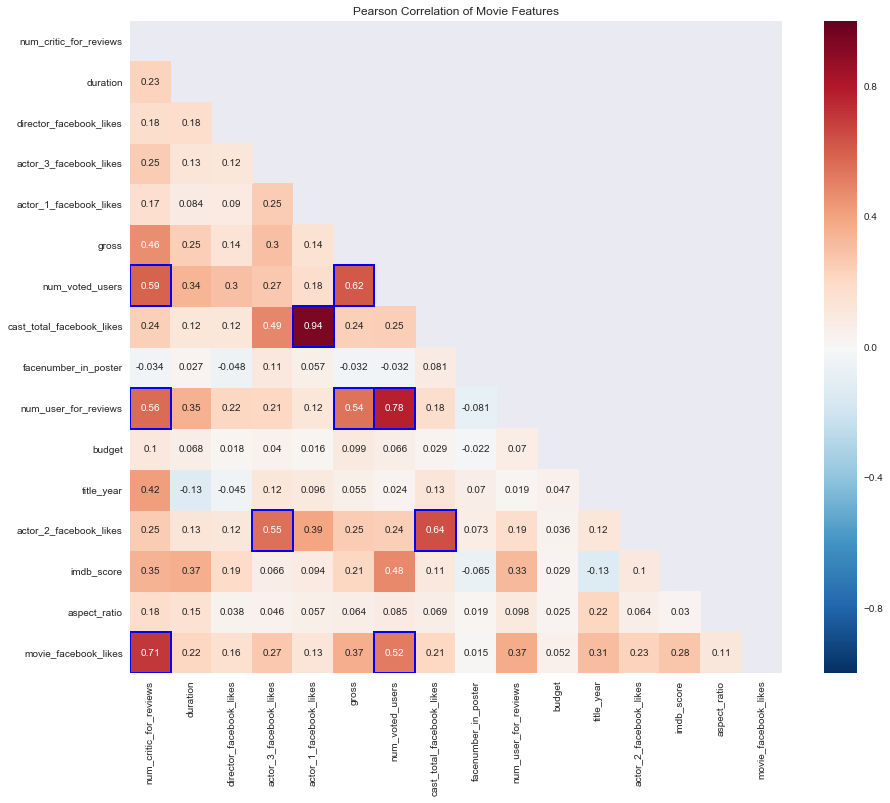

In [11]:
data['numerical_correlation'] = data['numerical'].corr()
plt.subplots(figsize=(15, 12))
plt.title('Pearson Correlation of Movie Features')

# Mask to remove diagonal and upper half
mask = np.zeros_like(data['numerical_correlation'], dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(data['numerical_correlation'],vmax=1,square=True,annot=True,mask=mask);


for cell in ax.texts:
    if (abs(float(cell.get_text())) > 0.5):
        ax.add_patch(Rectangle((int(cell.get_position()[0]-0.5), int(cell.get_position()[1]-0.5)), 1, 1, fill=False, edgecolor='blue', lw=2))

plt.show()

From our correlation matrix, we can see some interesting correlations: 'imdb_score' and 'budget' do not seem to correlate with anything. On the other hand there is good correlation between 'gross', 'num_voted_users' and 'num_user_for_reviews'. In order to validate our data, we check how many entries have a "reasonable" value: num_voted_users should be above 10000 users, num_critic_for_reviews should be more than 50 reviews, and gross should be above 5000000 USD. We can visualize this with a bar chart, by plotting the reasonable values next to the total values.

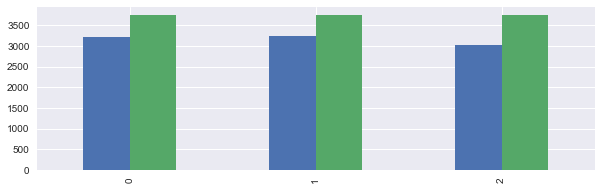

In [12]:
a1 = data['numerical'].loc[data['numerical']['num_voted_users'] > 10_000].shape[0]
a2 = data['numerical']['num_voted_users'].shape[0]
b1 = data['numerical'].loc[data['numerical']['num_critic_for_reviews'] > 50].shape[0]
b2 = data['numerical']['num_critic_for_reviews'].shape[0]
c1 = data['numerical'].loc[data['numerical']['gross'] > 5_000_000].shape[0]
c2 = data['numerical']['gross'].shape[0]
data['validation'] = pd.DataFrame([[a1, a2], [b1, b2], [c1, c2]])
data['validation'].columns = ["Individual", "Total"]
ax = data['validation'].plot(kind='bar', legend=False, figsize=(10, 3));

From the bar chart we can see that the reasonable values constitute the majority of the total datapoint. This is promising for our regression analysis.

## 4. Model

### Principle Component Analysis

The goal for our PCA is to create a reduced set of new dimensions.

In [14]:
pca = PCA(n_components=11)
data['PCA11'] = pca.fit_transform(data['X_std'])
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.362440,0.207521,0.157732,0.251712,0.221450,0.317211,0.385512,0.283258,0.004337,0.340108,0.057476,0.104975,0.262336,0.224365,0.091949,0.318098
1,-0.154194,-0.177734,-0.094453,0.278092,0.463158,-0.134991,-0.239589,0.505795,0.161038,-0.256853,-0.037041,0.117232,0.365821,-0.238896,-0.006977,-0.120176
2,-0.330901,0.272510,0.208846,0.007903,0.166501,0.017868,0.094186,0.150565,-0.093013,0.074287,-0.067276,-0.666636,0.063824,0.273229,-0.282531,-0.302210
3,-0.059230,0.474262,0.127842,-0.136565,0.076515,-0.246248,-0.101489,0.021862,0.350118,-0.108786,-0.067809,0.019088,-0.067790,0.191753,0.688959,-0.062417
4,0.044003,-0.060543,0.118181,-0.293047,0.291789,-0.116007,-0.065505,0.165750,-0.754693,-0.018235,0.318077,0.094422,-0.105750,0.053235,0.253928,-0.075595
5,-0.083645,0.156811,-0.158278,0.136836,-0.113997,0.127486,-0.037790,-0.053712,0.200152,0.005387,0.902110,-0.089398,0.066855,-0.102459,0.010454,-0.118805
6,0.045743,0.090730,-0.849084,-0.285988,0.254021,0.118125,0.067250,0.124596,0.060044,0.124546,-0.082931,-0.063899,-0.168814,0.169853,-0.020948,-0.023506
7,-0.164878,0.059441,-0.228887,0.323530,-0.238600,0.309118,0.025208,-0.089696,-0.327885,0.180042,-0.228174,-0.143744,0.208344,-0.341127,0.464330,-0.251057
8,-0.079685,-0.251746,0.277613,-0.333661,0.255540,0.304377,0.204105,0.091269,0.313624,0.307235,0.008518,-0.005196,-0.305867,-0.418076,0.110463,-0.246055
9,-0.027314,-0.708250,-0.033664,0.077386,-0.074923,-0.024578,0.163241,-0.030165,0.131196,-0.031451,0.086225,-0.189596,0.105270,0.511973,0.331270,-0.110538


The above table outlines our new dimensions in terms of their attributes similarity, for instance component 0 correlates more closely to attributes 0 than attributes 1.

# HER STARTER DEL 2

### 1. Explain which regression problem you have chosen to solve.

In this section we will explore regression and try to predict what revenue (gross) a movie will generate, based on available numerical data. We first take a look at the countries in the dataset. Since the dataset was created with webscraping and the author did not manually correct all the currencies, different countries use different currencies. 

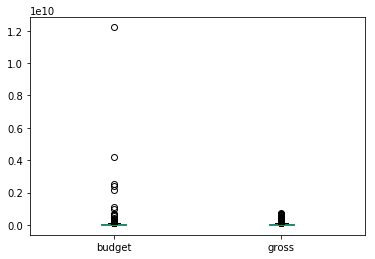

In [1]:
import pandas as pd
%matplotlib inline 
data = pd.Series({})
data['raw'] = pd.read_csv("movie_metadata.csv")
data['raw'][['budget', 'gross']].plot(kind='box'); # too high values exist

From the boxplot above, we can see that there are some extreme outliers in both gross and budget. Our hypothesis is that this is due to differences in currencies.

In [2]:
budget_top15 = data['raw']['budget'].nlargest(15).keys()
print("Top 15 movies (budget)")
data['raw'].loc[budget_top15][['movie_title', 'country', 'budget', 'gross']]

Top 15 movies (budget)


,movie_title,country,budget,gross
2988,The Host,South Korea,1.221550e+10,2201412.0
3859,Lady Vengeance,South Korea,4.200000e+09,211667.0
3005,Fateless,Hungary,2.500000e+09,195888.0
2323,Princess Mononoke,Japan,2.400000e+09,2298191.0
2334,Steamboy,Japan,2.127520e+09,410388.0
3423,Akira,Japan,1.100000e+09,439162.0
4542,Godzilla 2000,Japan,1.000000e+09,10037390.0
3075,Kabhi Alvida Naa Kehna,India,7.000000e+08,3275443.0
3851,Tango,Spain,7.000000e+08,1687311.0
3273,Kites,India,6.000000e+08,1602466.0


In [3]:
gross_top15 = data['raw']['gross'].nlargest(15).keys()
print("Top 15 movies (gross)")
data['raw'].loc[gross_top15][['movie_title', 'country', 'budget', 'gross']]

Top 15 movies (gross)


,movie_title,country,budget,gross
0,Avatar,USA,237000000.0,760505847.0
26,Titanic,USA,200000000.0,658672302.0
29,Jurassic World,USA,150000000.0,652177271.0
17,The Avengers,USA,220000000.0,623279547.0
794,The Avengers,USA,220000000.0,623279547.0
66,The Dark Knight,USA,185000000.0,533316061.0
240,Star Wars: Episode I - The Phantom Menace,USA,115000000.0,474544677.0
3024,Star Wars: Episode IV - A New Hope,USA,11000000.0,460935665.0
8,Avengers: Age of Ultron,USA,250000000.0,458991599.0
3,The Dark Knight Rises,USA,250000000.0,448130642.0


Looking at the tables for top movies, in terms of budget and gross, we can see that budget outliers mainly come from countries where the local currency has substantially less value than USD (used for gross). These entries need to be dropped from our dataset, or converted into USD. It is the oppinion of the authors that reducing the amount of currencies to only USD would have been ideal, but an alternative is to only use US movies. We can further investigate this by counting the number of movies per country.

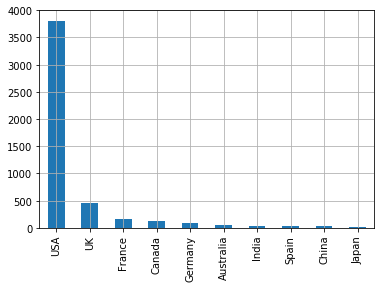

In [4]:
data['raw']['country'].value_counts().head(10).plot(kind='bar', grid=True); # Perhaps make it a cumsum plot

We can now create a reduced version of our dataset with only movies from the US. We also remove NA's and features which are unreliable : "'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes',                                         'cast_total_facebook_likes', 'director_facebook_likes', 'movie_facebook_likes',                                        'aspect_ratio', 'facenumber_in_poster'". Lastly we create a numerical version of our dataset, which excludes categorical data, as well as a standardized version.

In [5]:
from sklearn.preprocessing import StandardScaler
data['reduced'] = data['raw'][data['raw']['country'] == 'USA']
data['reduced'] = data['reduced'].drop(['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 
                                        'cast_total_facebook_likes', 'director_facebook_likes', 'movie_facebook_likes',
                                        'aspect_ratio', 'facenumber_in_poster'], axis=1)
data['reduced'] = data['reduced'].dropna()
data['numerical'] = data['reduced'].select_dtypes(exclude=['object'])
data['standardized'] = StandardScaler().fit_transform(data['numerical'].values)
data['standardized'] = pd.DataFrame(data['standardized'], columns=data['numerical'].columns.values)
data['standardized'].describe()

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score
count,3.032000e+03,3.032000e+03,3.032000e+03,3.032000e+03,3.032000e+03,3.032000e+03,3.032000e+03,3.032000e+03
mean,-1.662771e-16,8.418215e-17,2.728322e-16,1.229228e-16,2.328466e-16,4.321631e-15,4.285779e-15,1.109317e-15
std,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00
min,-1.304013e+00,-3.281843e+00,-7.952567e-01,-6.877954e-01,-8.150535e-01,-9.243274e-01,-7.525306e+00,-4.546722e+00
25%,-7.277681e-01,-6.576698e-01,-6.286897e-01,-5.646367e-01,-5.550210e-01,-6.735812e-01,-4.082007e-01,-5.567984e-01
50%,-2.395608e-01,-2.052262e-01,-3.216156e-01,-3.423146e-01,-3.119999e-01,-3.544434e-01,1.001639e-01,1.081889e-01
75%,4.587356e-01,4.281949e-01,2.383942e-01,1.521262e-01,1.570307e-01,3.294233e-01,7.102015e-01,6.781780e-01
max,5.186743e+00,9.974756e+00,9.629037e+00,9.990465e+00,1.052188e+01,5.914335e+00,1.320239e+00,2.768138e+00


In [6]:
budget_top15 = data['reduced']['budget'].nlargest(15).keys()
data['reduced'].loc[budget_top15][['movie_title', 'country', 'budget', 'gross']]

,movie_title,country,budget,gross
1,Pirates of the Caribbean: At World's End,USA,300000000.0,309404152.0
5,John Carter,USA,263700000.0,73058679.0
7,Tangled,USA,260000000.0,200807262.0
6,Spider-Man 3,USA,258000000.0,336530303.0
3461,Spider-Man 3,USA,258000000.0,336530303.0
3,The Dark Knight Rises,USA,250000000.0,448130642.0
8,Avengers: Age of Ultron,USA,250000000.0,458991599.0
10,Batman v Superman: Dawn of Justice,USA,250000000.0,330249062.0
18,Pirates of the Caribbean: On Stranger Tides,USA,250000000.0,241063875.0
27,Captain America: Civil War,USA,250000000.0,407197282.0


In [7]:
gross_top15 = data['reduced']['gross'].nlargest(15).keys()
data['reduced'].loc[gross_top15][['movie_title', 'country', 'budget', 'gross']]

,movie_title,country,budget,gross
0,Avatar,USA,237000000.0,760505847.0
26,Titanic,USA,200000000.0,658672302.0
29,Jurassic World,USA,150000000.0,652177271.0
17,The Avengers,USA,220000000.0,623279547.0
794,The Avengers,USA,220000000.0,623279547.0
66,The Dark Knight,USA,185000000.0,533316061.0
240,Star Wars: Episode I - The Phantom Menace,USA,115000000.0,474544677.0
3024,Star Wars: Episode IV - A New Hope,USA,11000000.0,460935665.0
8,Avengers: Age of Ultron,USA,250000000.0,458991599.0
3,The Dark Knight Rises,USA,250000000.0,448130642.0


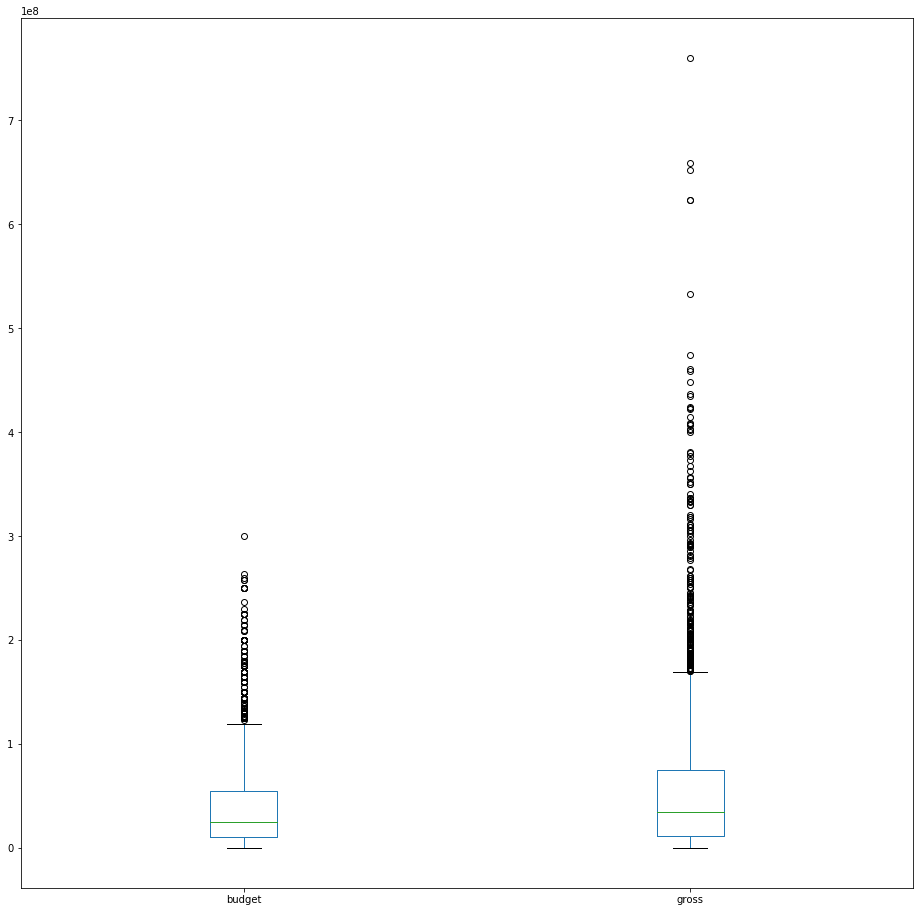

In [11]:
data['reduced'][['budget', 'gross']].plot(kind='box',figsize=(16,16));

From the above tables and graph we can see that the dataset has a more reasonable distribution and outliers in both budget and gross are roughly within the same order of magnitude.

# Dataset splitting for regression

In [48]:
from sklearn.model_selection import train_test_split

#X = data['standardized'][['num_critic_for_reviews', 'duration', 'num_voted_users',
#                       'num_user_for_reviews', 'budget', 'title_year', 'imdb_score']]

X = data['standardized'].drop('gross', axis=1)
y = data['standardized'][['gross']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## 2. Apply linear regression with forward selection and consider if transforming or combining attributes potentially may be useful. For linear regression, plotting the residual error vs. the attributes can give some insight into whether including a transformation of a variable can improve the model, i.e. potentially describe parts of the residuals.

In [49]:
import numpy as np
 
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Ridge
from sklearn.cross_validation import train_test_split
 
import matplotlib.pyplot as plt

X_selected = SelectKBest(f_regression, k='all').fit_transform(X, y.values)
X_selected.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(3032, 7)

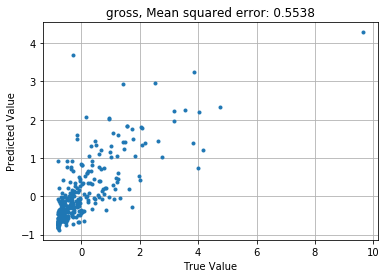

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

#X = data['standardized'][['num_critic_for_reviews', 'duration', 'num_voted_users',
#                       'num_user_for_reviews', 'budget', 'title_year', 'imdb_score']]

X = data['standardized'].drop('gross', axis=1)
y = data['standardized'][['gross']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
error = mean_squared_error(y_test, y_pred)

# Visualize prediction against true value
plt.figure()
plt.plot(y_test,y_pred,'.')
plt.grid()
plt.title('{0}, Mean squared error: {1:.04f}'.format(y_train.columns[0], error))
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

How much does each variable contribute.

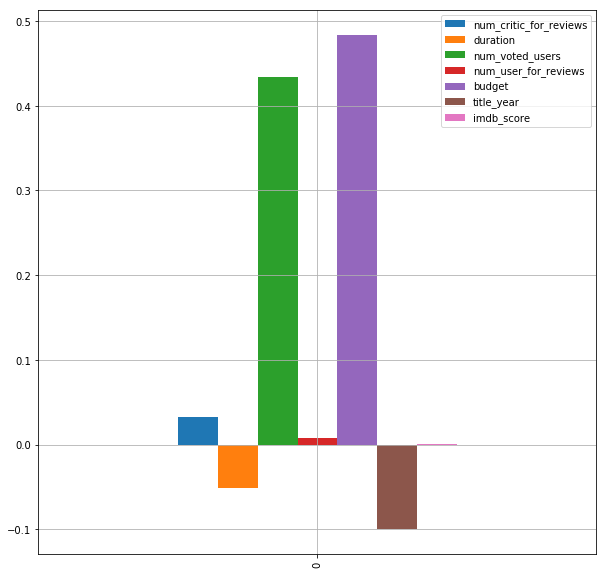

In [67]:
pd.DataFrame(lm.coef_, columns=X.columns.values.tolist()).plot.bar(grid=True, figsize=(10,10));

From the above graph we can see that some features contribute significantly less than others. It may be possible to create a better model by removing insignificant features.

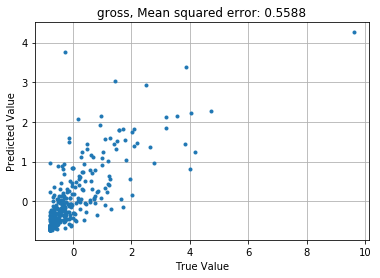

In [68]:
from sklearn.model_selection import train_test_split
X = data['standardized'][['num_voted_users', 'budget']]

y = data['standardized'][['gross']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
error = mean_squared_error(y_test, y_pred)

# Visualize prediction against true value
plt.figure()
plt.plot(y_test,y_pred,'.')
plt.grid()
plt.title('{0}, Mean squared error: {1:.04f}'.format(y_train.columns[0], error))
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

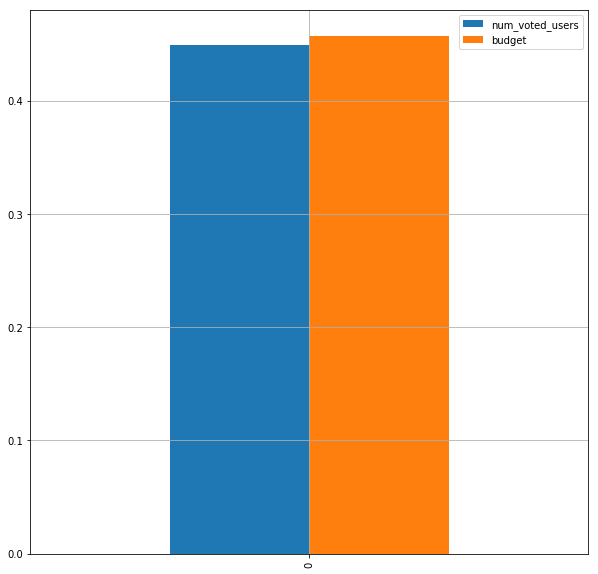

In [69]:
pd.DataFrame(lm.coef_, columns=X.columns.values.tolist()).plot.bar(grid=True, figsize=(10,10));

## 3. Explain how a new data observation is predicted according to the estimated model. I.e. what are the effects of the selected attributes in terms of predicting the data. (Notice, if you interpret the magnitude of the estimated coefficients this in general requires that each attribute be normalized prior to the analysis.).

In [393]:
values = [31, 41, 80]

for n in values:
    print("[{}] Prediction: {}\tTrue: {}\tDifference: {}\tTitle: {}"
          .format(n, y_pred[n], y_test.values[n], y_pred[n]-y_test.values[n], data['reduced'].iloc[n]['movie_title']))

[31] Prediction: [-0.29696872]	True: [-0.54144549]	Difference: [ 0.24447677]	Title: The Amazing Spider-Man 2 
[41] Prediction: [-0.87892251]	True: [-0.7348363]	Difference: [-0.14408622]	Title: Jack the Giant Slayer 
[80] Prediction: [-0.43330609]	True: [-0.61041888]	Difference: [ 0.17711279]	Title: Independence Day: Resurgence 


## 4. Fit an artificial neural network (ANN) model to the data.

In [101]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

# Feature selection
X = data['standardized'][['num_critic_for_reviews', 'duration', 'num_voted_users',
                       'num_user_for_reviews', 'budget', 'title_year', 'imdb_score']]

#X = data['standardized'][['num_voted_users', 'budget']]

y = data['standardized'][['gross']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

shape = X.shape[1]

adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model = Sequential()
model.add(Dense(15, input_shape=(shape,), activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=adam, metrics=[])
history = model.fit(X_train.values, y_train.values, epochs = 300, batch_size=500, shuffle=False, verbose=1)

y_pred = model.predict(X_test.values, batch_size = 1000)

Epoch 1/300
2728/2728 [==============================] - 0s - loss: 0.6297     
Epoch 2/300
2728/2728 [==============================] - 0s - loss: 0.4780     
Epoch 3/300
2728/2728 [==============================] - 0s - loss: 0.4218     
Epoch 4/300
2728/2728 [==============================] - 0s - loss: 0.3974     
Epoch 5/300
2728/2728 [==============================] - 0s - loss: 0.3689     
Epoch 6/300
2728/2728 [==============================] - 0s - loss: 0.3585     
Epoch 7/300
2728/2728 [==============================] - 0s - loss: 0.3494     
Epoch 8/300
2728/2728 [==============================] - 0s - loss: 0.3371     
Epoch 9/300
2728/2728 [==============================] - 0s - loss: 0.3221     
Epoch 10/300
2728/2728 [==============================] - 0s - loss: 0.3260     
Epoch 11/300
2728/2728 [==============================] - 0s - loss: 0.3123     
Epoch 12/300
2728/2728 [==============================] - 0s - loss: 0.3150     
Epoch 13/300
2728/2728 [=============

2728/2728 [==============================] - 0s - loss: 0.1609     
Epoch 103/300
2728/2728 [==============================] - 0s - loss: 0.1583     
Epoch 104/300
2728/2728 [==============================] - 0s - loss: 0.1639     
Epoch 105/300
2728/2728 [==============================] - 0s - loss: 0.1713     
Epoch 106/300
2728/2728 [==============================] - 0s - loss: 0.1721     
Epoch 107/300
2728/2728 [==============================] - 0s - loss: 0.1742     
Epoch 108/300
2728/2728 [==============================] - 0s - loss: 0.1965     
Epoch 109/300
2728/2728 [==============================] - 0s - loss: 0.1942     
Epoch 110/300
2728/2728 [==============================] - 0s - loss: 0.1761     
Epoch 111/300
2728/2728 [==============================] - 0s - loss: 0.1836     
Epoch 112/300
2728/2728 [==============================] - 0s - loss: 0.1941     
Epoch 113/300
2728/2728 [==============================] - 0s - loss: 0.1999     
Epoch 114/300
2728/2728 [=====

2728/2728 [==============================] - 0s - loss: 0.1363     
Epoch 202/300
2728/2728 [==============================] - 0s - loss: 0.1396     
Epoch 203/300
2728/2728 [==============================] - 0s - loss: 0.1269     
Epoch 204/300
2728/2728 [==============================] - 0s - loss: 0.1217     
Epoch 205/300
2728/2728 [==============================] - 0s - loss: 0.1301     
Epoch 206/300
2728/2728 [==============================] - 0s - loss: 0.1445     
Epoch 207/300
2728/2728 [==============================] - 0s - loss: 0.1583     
Epoch 208/300
2728/2728 [==============================] - 0s - loss: 0.1392     
Epoch 209/300
2728/2728 [==============================] - 0s - loss: 0.1390     
Epoch 210/300
2728/2728 [==============================] - 0s - loss: 0.1356     
Epoch 211/300
2728/2728 [==============================] - 0s - loss: 0.1233     
Epoch 212/300
2728/2728 [==============================] - 0s - loss: 0.1202     
Epoch 213/300
2728/2728 [=====

In [104]:
data['numerical'].head()

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score
0,723.0,178.0,760505847.0,886204,3054.0,237000000.0,2009.0,7.9
1,302.0,169.0,309404152.0,471220,1238.0,300000000.0,2007.0,7.1
3,813.0,164.0,448130642.0,1144337,2701.0,250000000.0,2012.0,8.5
5,462.0,132.0,73058679.0,212204,738.0,263700000.0,2012.0,6.6
6,392.0,156.0,336530303.0,383056,1902.0,258000000.0,2007.0,6.2


In [102]:
data['standardized'].head()

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score
0,4.466437,3.097612,9.629037,4.912320,6.601949,4.478215,0.608529,1.438163
1,1.097007,2.690413,3.445757,2.289804,2.188687,5.914335,0.405183,0.678178
2,5.186743,2.464191,5.347290,6.543607,5.744085,4.774557,0.913547,2.008153
3,2.377550,1.016372,0.206154,0.652937,0.973581,5.086856,0.913547,0.203187
4,1.817312,2.102236,3.817577,1.732646,3.802347,4.956922,0.405183,-0.176806


In [ ]:
print(model.predict())



## 5. Statistically evaluate if there is a significant performance difference between the fitted ANN and linear regression models based on the same cross-validation splits (i.e., considering the credibility interval equivalent to the use of a paired t-test as described in lecture 6 and last exercise week 6). Compare in addition if the performance of your models are better than simply predicting the output to be the average of the training data output. 

0
[0] LinearModel: 0.5588010046000386	ANN: 0.3897008571921871
[1] LinearModel: 0.5588010046000386	ANN: 0.38264985415146746
[2] LinearModel: 0.5588010046000386	ANN: 0.3929281337044539
[3] LinearModel: 0.5588010046000386	ANN: 0.3875535700490409
[4] LinearModel: 0.5588010046000386	ANN: 0.4257637149108736
[5] LinearModel: 0.5588010046000386	ANN: 0.37215560002092213
[6] LinearModel: 0.5588010046000386	ANN: 0.540427072317267
[7] LinearModel: 0.5588010046000386	ANN: 0.5476607981064985
[8] LinearModel: 0.5588010046000386	ANN: 0.5361026242749575
[9] LinearModel: 0.5588010046000386	ANN: 0.5404597948971549
10
[10] LinearModel: 0.5588010046000386	ANN: 0.5632830589634212
[11] LinearModel: 0.5588010046000386	ANN: 0.563470261272461
[12] LinearModel: 0.5588010046000386	ANN: 0.5812480528106739
[13] LinearModel: 0.5588010046000386	ANN: 0.4708326777948232
[14] LinearModel: 0.5588010046000386	ANN: 0.5213141400121543
[15] LinearModel: 0.5588010046000386	ANN: 0.5507745160467284
[16] LinearModel: 0.558801004

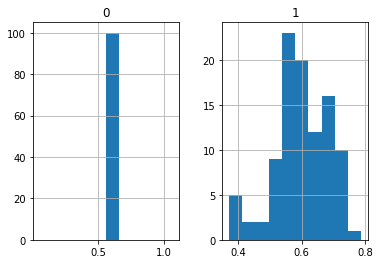

In [115]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature selection
X = data['standardized'][['num_critic_for_reviews', 'duration', 'num_voted_users',
                       'num_user_for_reviews', 'budget', 'title_year', 'imdb_score']]

X = data['standardized'][['num_voted_users', 'budget']]
y = data['standardized'][['gross']]

lm = LinearRegression()

shape = X.shape[1]
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model = Sequential()
model.add(Dense(15, input_shape=(shape,), activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=adam, metrics=[])

scores = []

for n in range(100):
    if (n % 10 == 0):
        print(n)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    lm.fit(X_train, y_train)
    lm_y_pred = lm.predict(X_test)
    lm_error = mean_squared_error(y_test, lm_y_pred)
    history = model.fit(X_train.values, y_train.values, epochs=300, batch_size=500, shuffle=False, verbose=0)
    ann_y_pred = model.predict(X_test.values, batch_size = 1000)
    ann_error = mean_squared_error(y_test, ann_y_pred)
    print("[{}] LinearModel: {}\tANN: {}".format(n, lm_error, ann_error))
    scores.append([lm_error, ann_error])
    
pd.DataFrame(scores).hist();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002748E8108D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027493C76DA0>]], dtype=object)

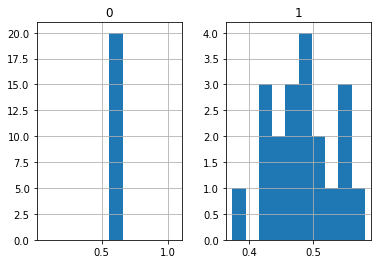

In [114]:
pd.DataFrame(scores).hist();